In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]= '2'

In [2]:
%matplotlib inline

import sys
sys.path.append("../../")

from train_model_norm import train

from sklearn.linear_model import LinearRegression
from yellowbrick.regressor import ResidualsPlot, PredictionError

import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib import rcParams
rcParams['figure.figsize'] = (8, 4)
rcParams['figure.dpi'] = 100
rcParams['font.size'] = 8
rcParams['font.family'] = 'sans-serif'
rcParams['axes.facecolor'] = '#ffffff'
rcParams['lines.linewidth'] = 2.0

2023-11-04 13:25:12.752684: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
hyperparameter={
"num_nearest":60,
"sigma":10,
"learning_rate":0.008,
"batch_size":250,
"num_neuron":15,
"num_layers":2,
"size_embedded":50,
"num_nearest_geo":30,
"num_nearest_eucli":30,
"id_dataset":'poa',
"epochs":300,
"optimier":'adam',
"validation_split":0.1,
"label":'asi_poa',
"early_stopping": False,
"graph_label":'matrix',
}

# Model

In [4]:
spatial = train(**hyperparameter)

In [5]:
dataset,\
result,\
fit,\
embedded_train,\
embedded_test,\
predict_regression_train,\
predict_regression_test = spatial()

2023-11-04 13:25:32.012984: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:267] failed call to cuInit: CUDA_ERROR_COMPAT_NOT_SUPPORTED_ON_DEVICE: forward compatibility was attempted on non supported HW
2023-11-04 13:25:32.013145: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: user-desktop
2023-11-04 13:25:32.013186: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: user-desktop
2023-11-04 13:25:32.013856: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:200] libcuda reported version is: 525.147.5
2023-11-04 13:25:32.014047: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:204] kernel reported version is: 525.125.6
2023-11-04 13:25:32.014085: E tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:313] kernel version 525.125.6 does not match DSO version 525.147.5 -- cannot find working devices in this configuration
2023-1

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089
Epoch 1/300
42/45 [===========================>..] - ETA: 0s - loss: 3.5909 - root_mean_squared_error: 5.4977
Epoch 1: val_loss improved from inf to 0.52114, saving model to /disk1/jupyter/smhan/ASI-revised/output_norm/models/poa/asi_poa_weights.hdf5
45/45 [==============================] - 9s 52ms/step - loss: 3.4357 - root_mean_squared_error: 5.3580 - val_loss: 0.5211 - val_root_mean_squared_error: 0.6659 - lr: 0.0080
Epoch 2/300
45/45 [==============================] - ETA: 0s - loss: 0.3647 - root_mean_squared_error: 0.4730
Epoch 2: val_loss improved from 0.52114 to 0.28174, saving model to /disk1/jupyter/smhan/ASI-revised/output_norm/models/poa/asi_poa_weights.hdf5
45/45 [==============================] - 1s 20ms/step - loss: 0.3647 - root_mean_squared_error: 0.4730 - val_loss: 0.281

45/45 [==============================] - 1s 24ms/step - loss: 0.1509 - root_mean_squared_error: 0.2116 - val_loss: 0.1542 - val_root_mean_squared_error: 0.2084 - lr: 8.0000e-04
Epoch 21/300
43/45 [===========================>..] - ETA: 0s - loss: 0.1497 - root_mean_squared_error: 0.2109
Epoch 21: val_loss improved from 0.15418 to 0.15348, saving model to /disk1/jupyter/smhan/ASI-revised/output_norm/models/poa/asi_poa_weights.hdf5
45/45 [==============================] - 1s 23ms/step - loss: 0.1496 - root_mean_squared_error: 0.2106 - val_loss: 0.1535 - val_root_mean_squared_error: 0.2080 - lr: 8.0000e-04
Epoch 22/300
44/45 [============================>.] - ETA: 0s - loss: 0.1494 - root_mean_squared_error: 0.2107
Epoch 22: val_loss did not improve from 0.15348
45/45 [==============================] - 1s 23ms/step - loss: 0.1494 - root_mean_squared_error: 0.2106 - val_loss: 0.1549 - val_root_mean_squared_error: 0.2095 - lr: 8.0000e-04
Epoch 23/300
44/45 [============================>.] -

In [6]:
print('################# Test ##########################')
print('MALE test:.... {}'.format(result[0]))
print('RMSE test:.... {}'.format(result[1]))
print('MAPE test:.... {}'.format(result[2]))
print('################# Train ##########################')
print('MALE train:.... {}'.format(result[3]))
print('RMSE train:.... {}'.format(result[4]))
print('MAPE train:.... {}'.format(result[5]))

################# Test ##########################
MALE test:.... 0.15149648714467212
RMSE test:.... 98615.2427479062
MAPE test:.... 10.889183417792758
################# Train ##########################
MALE train:.... 0.14837384327238634
RMSE train:.... 100254.89151302852
MAPE train:.... 10.179247502195892


In [7]:
from sklearn.metrics import r2_score
import numpy as np

# metric
def metric(pred, label):
    assert label.shape == pred.shape
    
    with np.errstate(divide = 'ignore', invalid = 'ignore'):
        mask = np.not_equal(label, 0)
        mask = mask.astype(np.float32)
        mask /= np.mean(mask)
        male = np.abs(np.subtract(np.log(pred), np.log(label))).astype(np.float32)
        male = np.nan_to_num(male * mask)
        male = np.mean(male)
        mae = np.abs(np.subtract(pred, label)).astype(np.float32)
        rmse = np.square(mae)
        mape = np.divide(mae, label)
        mae = np.nan_to_num(mae * mask)
        mae = np.mean(mae)
        rmse = np.nan_to_num(rmse * mask)
        rmse = np.sqrt(np.mean(rmse))
        mape = np.nan_to_num(mape * mask)
        mape = np.median(mape) # np.mean(mape) -- author leverages median
    return male, rmse, mape



In [8]:
y_label = np.exp(dataset.y_test)
y_pred = np.exp(result[6].flatten())
metric(y_pred, y_label) # should be same value

(0.15149648, 98615.24, 0.10889183417792794)

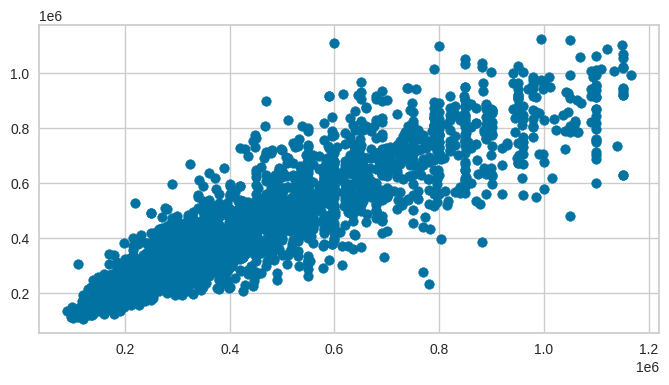

In [9]:
plt.scatter(y_label, y_pred)